1. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sb

In [19]:
def mse(b_3, y=ks, x=zp, n=n):
    return np.sum((b_3 * x - y)**2)/n

In [30]:
def mse_1(beta_0, beta_1, y=ks, x=zp, n=n):
    return np.sum((beta_0 + beta_1 * x - y)**2)/n

In [4]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
n = len(zp)

In [5]:
a = (n * np.sum(zp * ks) - np.sum(zp) * np.sum(ks)) / (n * np.sum(zp**2) - (np.sum(zp))**2)
a

2.6205388824027653

In [6]:
b = np.mean(ks) - a * np.mean(zp)

In [7]:
y_hat = 444.177 + 2.621 * zp
y_hat

array([535.912, 562.122, 942.167, 968.377, 549.017, 627.647, 585.711,
       837.327, 758.697, 732.487])

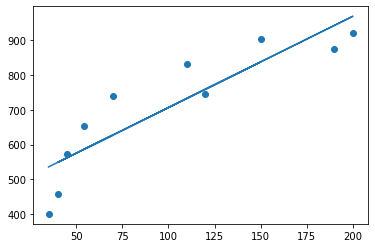

In [8]:
%matplotlib inline
plt.scatter(zp, ks)
plt.plot(zp, 444.177 + 2.621 * zp)
plt.show()

In [11]:
x_1 = zp.reshape(10, 1)
y_1 = ks.reshape(10, 1)
x_1 = np.hstack([np.ones((10,1)), x_1])
b_1 = np.dot(np.linalg.inv(np.dot(x_1.T,x_1)), x_1.T@y_1)
b_1

array([[444.17735732],
       [  2.62053888]])

In [14]:
x_2 = zp.reshape(10, 1)
y_2 = ks.reshape(10, 1)
b_2 = np.dot(np.linalg.inv(np.dot(x_2.T,x_2)), x_2.T@y_2)
b_2

array([[5.88982042]])

2. Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [52]:
alpha = 6e-6
alpha_1 = 7e-5
b_3 = 0.1
beta_1 = 0.1
beta_0 = 0.1

In [29]:
for i in range(100):
    b_3 -= alpha * (2 / n) * np.sum((b_3 * zp - ks) * zp)
    if i%10 == 0:
        print('iter {i}, b = {b_3}, mse = {mse}'.format(i = i, b_3 = b_3, mse = mse(b_3)))

iter 0, b = 1.05716848, mse = 378262.8044236586
iter 10, b = 5.096607547510395, mse = 65184.91137369834
iter 20, b = 5.7596255149154025, mse = 56750.38161318177
iter 30, b = 5.868450729940318, mse = 56523.149688282865
iter 40, b = 5.8863128815069965, mse = 56517.02790684877
iter 50, b = 5.889244706254763, mse = 56516.86298192482
iter 60, b = 5.88972592467459, mse = 56516.85853873605
iter 70, b = 5.889804910012222, mse = 56516.85841903356
iter 80, b = 5.889817874361266, mse = 56516.85841580869
iter 90, b = 5.889820002279575, mse = 56516.85841572182


3. В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица критических точек распределения Стьюдента?

Функция Лапласа применяется тогда, когда необходимо рассчитать вероятность того, что наша случайная велечина попадет в какой то диапазон.
Таблица Стьюдента используется при проверке гипотез о среднем значении, о различии между двумя средними и о пропорциональности значений

4. Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [57]:
for j in range(140000):
    beta_1 -= alpha_1 * (2 / n) * np.sum((beta_0 + beta_1 * zp - ks) * zp)
    beta_0 -= alpha_1 * (2 / n) * np.sum((beta_0 + beta_1 * zp - ks))
    if j%10000 == 0:
        print('iter {j}, b0 = {beta_0} b1 = {beta_1}, mse = {mse_1}'.format(j = j, beta_0=beta_0, beta_1 = beta_1, mse_1 = mse_1(beta_0, beta_1)))

iter 0, b0 = 444.15604114744383 b1 = 2.62069577888959, mse = 6470.414316436769
iter 10000, b0 = 444.1624133044404 b1 = 2.6206488769967127, mse = 6470.414257826053
iter 20000, b0 = 444.1668805989958 b1 = 2.6206159957336186, mse = 6470.414229019368
iter 30000, b0 = 444.1700124616698 b1 = 2.6205929438396156, mse = 6470.414214861121
iter 40000, b0 = 444.17220810014334 b1 = 2.6205767829696724, mse = 6470.4142079024605
iter 50000, b0 = 444.17374738484745 b1 = 2.6205654531536724, mse = 6470.414204482331
iter 60000, b0 = 444.17482652307166 b1 = 2.620557510219211, mse = 6470.4142028013675
iter 70000, b0 = 444.1755830688274 b1 = 2.62055194170795, mse = 6470.414201975194
iter 80000, b0 = 444.17611345637334 b1 = 2.620548037821106, mse = 6470.414201569132
iter 90000, b0 = 444.1764852923804 b1 = 2.620545300943692, mse = 6470.4142013695555
iter 100000, b0 = 444.17674597349225 b1 = 2.6205433822154505, mse = 6470.414201271466
iter 110000, b0 = 444.17692872782624 b1 = 2.6205420370627506, mse = 6470.4142